<a href="https://colab.research.google.com/github/lcbjrrr/quant/blob/master/Reg_Log.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
dados = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/quant/master/peso_altura%20-%20all.csv')
dados.head(2)

,SEXO,ALTURA,PESO
0,0,187.571423,109.951620
1,0,174.706036,73.777488


In [4]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(dados[['ALTURA','PESO']],dados['SEXO'] ,test_size=0.2)
X_treino.head(2)

,ALTURA,PESO
3400,180.712632,93.529496
3704,171.463584,75.631240


In [5]:
import statsmodels.api as sm
Xs = sm.add_constant(X_treino)
rl0 = sm.Logit(y_treino, Xs).fit()
rl0.summary2().tables[1]

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.203589
         Iterations 8


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-0.265727,1.508996,-0.176095,8.602193e-01,-3.223304,2.691851
ALTURA,0.195195,0.012951,15.071868,2.479991e-51,0.169811,0.220578
PESO,-0.445268,0.012946,-34.393400,3.164651e-259,-0.470642,-0.419894


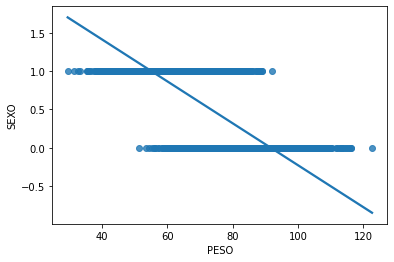

In [6]:
import seaborn as sns
sns.regplot(x="PESO", y="SEXO", data=dados)

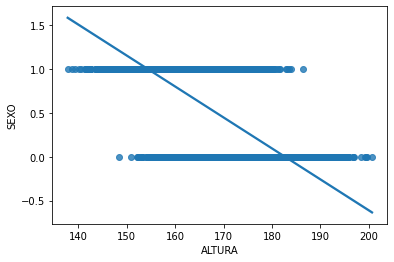

In [7]:
import seaborn as sns
sns.regplot(x="ALTURA", y="SEXO", data=dados)

In [8]:
import sklearn.linear_model as skl_lm
rlog = skl_lm.LogisticRegression()
rlog.fit(X_treino,y_treino)
acuracia_treino= rlog.score(X_treino,y_treino)*100
acuracia_treino

92.4

In [13]:
from sklearn.metrics import accuracy_score
prev_teste = rlog.predict(X_teste)
acuracia_teste = accuracy_score(y_teste,prev_teste)
acuracia_teste 

0.9015

[[871  95]
 [102 932]]


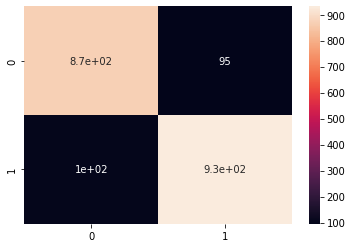

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_teste , prev_teste)
print(cm)
sns.heatmap(cm, annot=True)

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_teste , prev_teste))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       966
           1       0.91      0.90      0.90      1034

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000

